In [1]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import itertools
import copy
from IPython import display
% matplotlib inline

In [2]:
% run network_functions.ipynb

In [9]:
sgn = (1,1,2,2,2)
A = np.array([[ 0.5,         0.5,         0.,          0.,          0.,        ],
             [ 0.5,         0.5,         0.,          0.,          0.,        ],
             [ 0.,          0.,          0.33333333,  0.33333333,  0.33333333],
             [ 0.,          0.,          0.33333333,  0.33333333,  0.33333333],
             [ 0.,          0.,          0.33333333,  0.33333333,  0.33333333]])

B = np.array([[ 1,         0,         1,          0.,          0.,        ],
             [ 0,         1,         0.,          0.,          1,        ],
             [ 1,          0.,          1.,  1,  0],
             [ 0.,          0.,          1,  1,  1],
             [ 0.,          1,          0,  1,  1]])

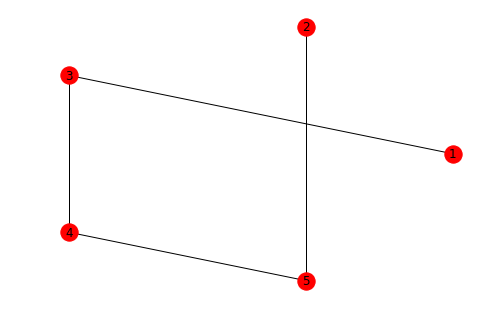

In [10]:
h = build_graph_from_adj(B)
draw_graph(h)

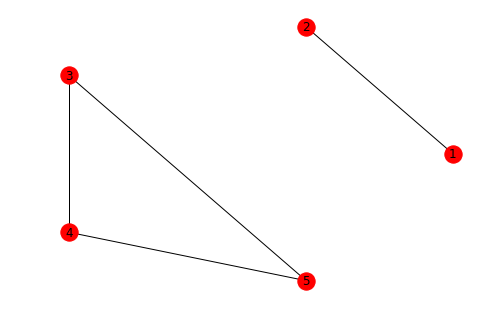

In [4]:
g = build_graph_from_adj(A)
draw_graph(g)

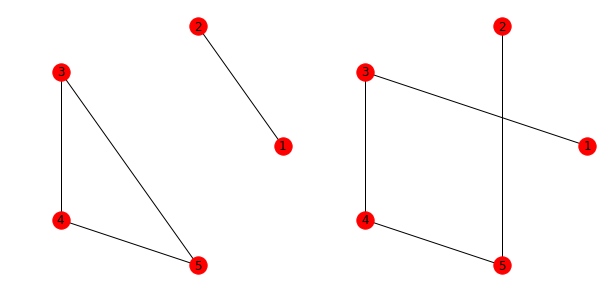

In [11]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
draw_graph(g)
plt.subplot(1, 2, 2)
draw_graph(h)
plt.show()

In [21]:
print(estimate_tau(A, n_iter=5000))

0.995642003745


In [22]:
def run_single_matrix_simulation(A, initial_state=None, sigma=1., n_iter=100, eps=1e-3):
    N = A.shape[0]
    if initial_state == None:
        x = np.random.random(N)
    
    E_ss = [np.var(x)]
    for i in range(n_iter):
        noise = np.random.normal(0, sigma, N)
        x = np.add(np.dot(A, x), noise)
        E_ss.append(np.var(x))
        
        display.clear_output(wait=True)
        
        plt.figure(figsize=[8, 4])
        
        plt.subplot(1,2,1)
        plt.title("E(t)")
        plt.xlabel("#iteration")
        plt.ylabel("E(t)")
        plt.plot(E_ss, 'b')
        
        plt.subplot(1,2,2)
        plt.title('Deviations')
        plt.bar(np.arange(N) + 1, x, align='center')
        
        plt.show()
    
        print('Current E: %f' % E_ss[-1])
        print(x.round(2))

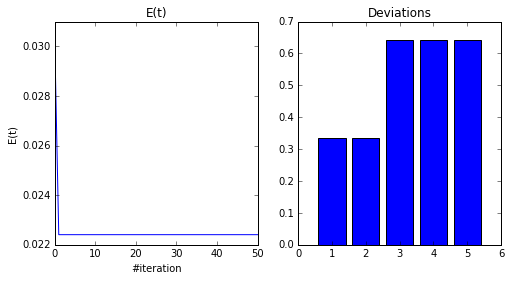

Current E: 0.022408
[ 0.34  0.34  0.64  0.64  0.64]


In [23]:
run_single_matrix_simulation(A, sigma=0.00, n_iter=50)

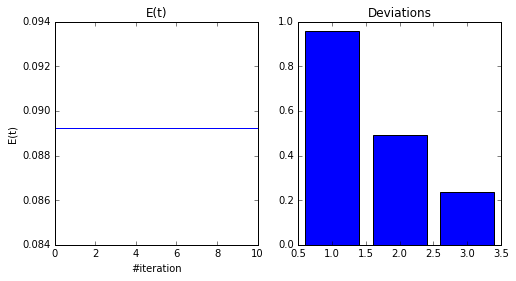

Current E: 0.089254
[ 0.96  0.49  0.24]


In [47]:
#fc = np.ones((3, 3)) / 3
fc = np.eye(3)
run_single_matrix_simulation(fc, sigma=0.0, n_iter=10)